## Tutor experiment analysis

Analysis code for the tutor training experiment.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

sns.set_theme()

In [2]:
df_after_exclusion = pd.read_csv("./data/tutor_experiment/tutor_experiment_exclusion_data.csv", converters={'BmpsActions': pd.eval, 'Actions': pd.eval})
df = pd.read_csv("./data/tutor_experiment/tutor_experiment_full_data.csv", converters={'BmpsActions': pd.eval, 'Actions': pd.eval})
questionnaire_df = pd.read_csv("./data/tutor_experiment/questionnaire.csv")
print(len(df_after_exclusion.groupby("Participant")))
print(list(df_after_exclusion.columns))
print(list(questionnaire_df.columns))
participants = df_after_exclusion["Participant"].unique().tolist()
all_participants = df["Participant"].unique().tolist()
print(len(participants), len(all_participants))

conditions = {
    0: "No Tutor",
    1: "Choice Tutor",
    2: "Dummy Tutor"
}

df_after_exclusion["NamedCondition"] = df_after_exclusion.apply(lambda x: conditions[x["Condition"]], axis=1)

questionnaire_df["Accepted"] = questionnaire_df["Participant"].isin(participants)


293
['Unnamed: 0', 'Participant', 'Condition', 'Counterbalance', 'TrialId', 'Score', 'ExpectedScore', 'ClickedScore', 'NumClicks', 'Actions', 'TestEnv', 'OptimalScore', 'ClickAgreement', 'RepeatAgreement', 'StrictRepeatAgreement', 'TermAgreement', 'RepeatClicks', 'BmpsReward', 'BmpsClick', 'BmpsRepeatClicks', 'BmpsActions', 'Cost', 'Tau', 'BmpsGoalStrategy', 'GoalStrategy', 'Excluded']
['Unnamed: 0', 'Participant', 'Condition', 'Counterbalance', 'Language', 'QuizAttempts', 'QuizFailures', 'Bonus', 'Duration', 'Was it necessary to click airports multiple times to achieve a high reward?', 'Which airports should be clicked first?', 'How enjoyable was it to learn strategies in the training environments?', 'How useful do you think the training environments were for you to learn a good strategy?', 'Have you participated this type of planning experiment in the past?', 'Did you try your best to achieve a high reward?', 'What is your age?', 'What gender do you identify with?', 'Any issues with 

In [3]:
def parse_gender(x):

    response = x["What gender do you identify with?"]
    if type(response) is str:
        if response.lower()[0] == "f" or response.lower()[0] == "w":
            return True
        else:
            return False
    else:
        #print(response)
        return None

questionnaire_df["Female"] = questionnaire_df.apply(lambda x: parse_gender(x), axis=1)

In [4]:
print("Total responses", len(df)/10, len(questionnaire_df[questionnaire_df["CompleteTrialData"]==True]))
print("Accepted responses", len(df_after_exclusion)/10)
print("Exclusions", len(df)/10 - len(df_after_exclusion)/10)
print("Median duration", questionnaire_df[questionnaire_df["CompleteTrialData"]==True]["Duration"].median()/60)
print("Average bonus", questionnaire_df[questionnaire_df["CompleteTrialData"]==True]["Bonus"].mean())
print("Average age", questionnaire_df["What is your age?"].mean())
print("Female participants", questionnaire_df["Female"].sum())

Total responses 330.0 330
Accepted responses 293.0
Exclusions 37.0
Median duration 40.47608799166667
Average bonus 0.9123030303030303
Average age 28.196374622356494
Female participants 164


Text(0, 0.5, 'Human Score')

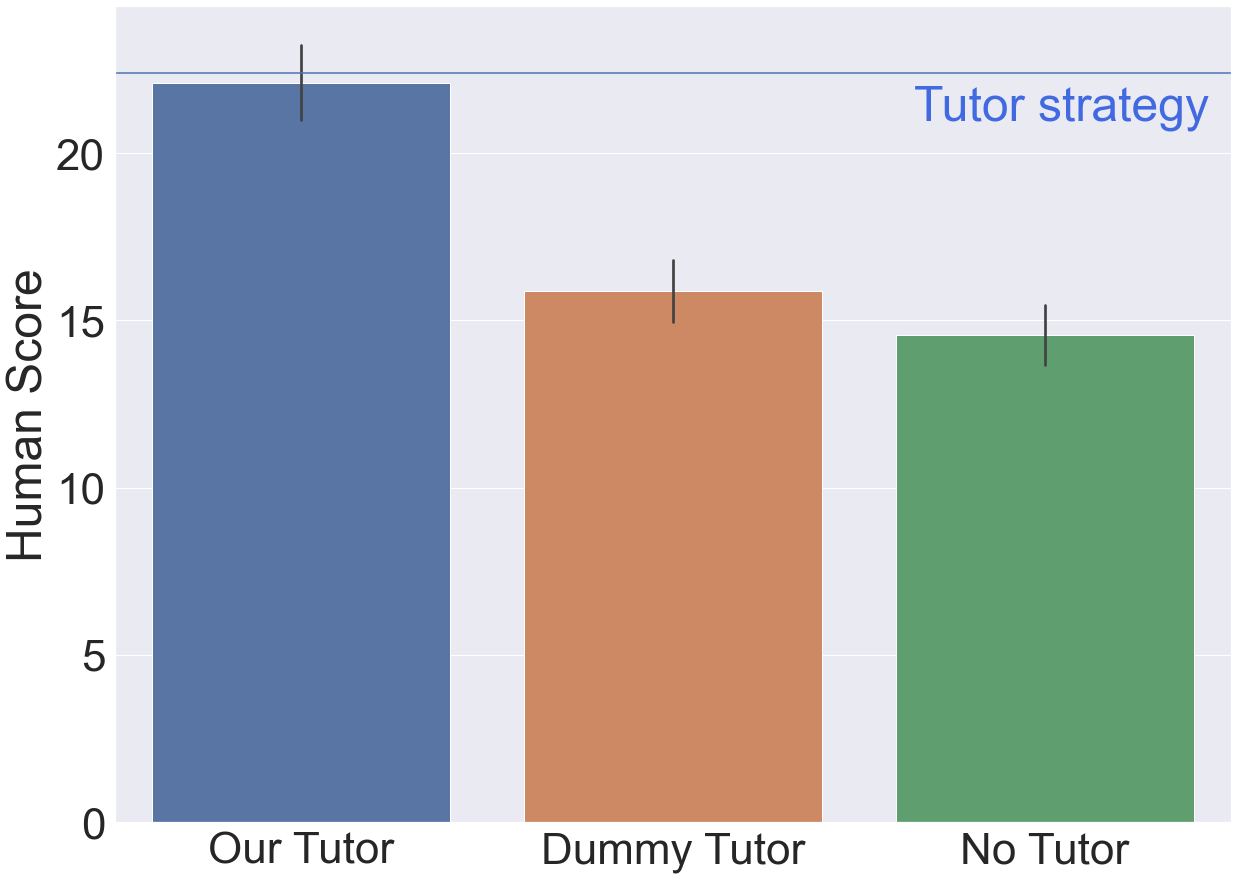

In [19]:
sns.set(rc={'figure.figsize':(20,15)})
sns.set(font_scale=4)

conditions = {
    0: "No Tutor",
    1: "Our Tutor",
    2: "Dummy Tutor"
}
condition_order = {
    0: 2,
    1: 0,
    2: 1
}
df_after_exclusion["NamedCondition"] = df_after_exclusion.apply(lambda x: conditions[x["Condition"]], axis=1)
df_after_exclusion["CustomOrder"] = df_after_exclusion.apply(lambda x: condition_order[x["Condition"]], axis=1)
g= sns.barplot(x = "NamedCondition", y = "ExpectedScore", data=df_after_exclusion, order=["Our Tutor", "Dummy Tutor", "No Tutor"])
avg_bmps = df_after_exclusion["BmpsReward"].mean()

g.axhline(avg_bmps)
g.text(1.65, 21, 'Tutor strategy', c="royalblue")
g.set_title("")
g.set_xlabel("")
g.set_ylabel("Human Score")


In [6]:
print(df_after_exclusion[["NamedCondition", "ExpectedScore", "GoalStrategy", "ClickAgreement", "TermAgreement", "RepeatAgreement"]].groupby("NamedCondition").agg(['mean', 'std']).round(2).to_latex())

\begin{tabular}{lrrrrrrrrrr}
\toprule
{} & \multicolumn{2}{l}{ExpectedScore} & \multicolumn{2}{l}{GoalStrategy} & \multicolumn{2}{l}{ClickAgreement} & \multicolumn{2}{l}{TermAgreement} & \multicolumn{2}{l}{RepeatAgreement} \\
{} &          mean &    std &         mean &   std &           mean &   std &          mean &   std &            mean &   std \\
NamedCondition &               &        &              &       &                &       &               &       &                 &       \\
\midrule
ChoiceTutor    &         22.10 &  16.84 &         0.69 &  0.46 &           0.33 &  0.18 &          0.87 &  0.18 &            0.18 &  0.25 \\
Control        &         14.57 &  14.34 &         0.18 &  0.38 &           0.16 &  0.16 &          0.89 &  0.13 &            0.08 &  0.20 \\
DummyTutor     &         15.87 &  15.56 &         0.46 &  0.50 &           0.26 &  0.19 &          0.84 &  0.22 &            0.09 &  0.20 \\
\bottomrule
\end{tabular}



In [9]:
def iqr(x):
    q1 = x.quantile(.25)
    q3 = x.quantile(.75)
    return q3 - q1

print(df_after_exclusion[["NamedCondition", "ExpectedScore", "ClickAgreement", "TermAgreement", "RepeatAgreement", "BmpsReward"]].groupby("NamedCondition").agg(["median", iqr]).round(2).to_latex())


\begin{tabular}{lrrrrrrrrrr}
\toprule
{} & \multicolumn{2}{l}{ExpectedScore} & \multicolumn{2}{l}{ClickAgreement} & \multicolumn{2}{l}{TermAgreement} & \multicolumn{2}{l}{RepeatAgreement} & \multicolumn{2}{l}{BmpsReward} \\
{} &        median &    iqr &         median &   iqr &        median &   iqr &          median &   iqr &     median &    iqr \\
NamedCondition &               &        &                &       &               &       &                 &       &            &        \\
\midrule
ChoiceTutor    &         22.67 &  26.14 &           0.32 &  0.24 &          0.94 &  0.05 &             0.0 &  0.33 &      22.42 &  21.98 \\
Control        &         11.46 &  19.68 &           0.12 &  0.25 &          0.93 &  0.07 &             0.0 &  0.00 &      22.70 &  21.25 \\
DummyTutor     &         14.11 &  23.34 &           0.25 &  0.30 &          0.92 &  0.09 &             0.0 &  0.00 &      22.62 &  21.21 \\
\bottomrule
\end{tabular}



In [20]:
from scipy.stats import wilcoxon
print("Bmps Reward for control condition", df_after_exclusion[df_after_exclusion["NamedCondition"]=="Control"][["BmpsReward"]].agg(["median", iqr]))
print("Bmps Reward for choice tutor condition", df_after_exclusion[df_after_exclusion["NamedCondition"]=="ChoiceTutor"][["BmpsReward"]].agg(["median", iqr]))

diff = df_after_exclusion[df_after_exclusion["NamedCondition"]=="Control"]["ExpectedScore"] - df_after_exclusion[df_after_exclusion["NamedCondition"]=="Control"]["BmpsReward"]
print("No Tutor condition", wilcoxon(diff))

diff = df_after_exclusion[df_after_exclusion["NamedCondition"]=="ChoiceTutor"]["ExpectedScore"] - df_after_exclusion[df_after_exclusion["NamedCondition"]=="ChoiceTutor"]["BmpsReward"]
print("Choice Tutor condition", wilcoxon(diff))

Bmps Reward for control condition         BmpsReward
median   22.701931
iqr      21.247703
Bmps Reward for choice tutor condition         BmpsReward
median   22.419563
iqr      21.982516
No Tutor condition WilcoxonResult(statistic=102373.0, pvalue=4.571735706279544e-44)
Choice Tutor condition WilcoxonResult(statistic=233687.0, pvalue=0.452524499531198)


In [8]:
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.stats.multitest import multipletests
tmp = df_after_exclusion.groupby("Participant").median()[["Condition", "GoalStrategy"]]
tmp.loc[tmp["GoalStrategy"]==0.5, "GoalStrategy"]=0
print(tmp.groupby("Condition").agg(["mean"])["GoalStrategy"])
counts = tmp.groupby("Condition").sum()["GoalStrategy"].astype(int).tolist()
nobs = tmp.groupby("Condition").count()["GoalStrategy"].tolist()
comparisons = ((1, 0), (1, 2))
stats, pvals = [], []
for comp in comparisons:  
    count = np.array([counts[comp[0]], counts[comp[1]]])
    nob = np.array([nobs[comp[0]], nobs[comp[1]]])
    stat, pval = proportions_ztest(count, nob)
    stats.append(stat)
    pvals.append(pval)

p_adjusted = multipletests(pvals, method="fdr_bh")[1]
print(pvals)
print(p_adjusted)
for comp, stat, pval, p_new in zip(comparisons, stats, pvals, p_adjusted):
    print(f"Z-test between condition {conditions[comp[0]]} and {conditions[comp[1]]}: z={np.round(stat, 3)}, p={np.round(pval, 4)}, corrected={np.round(p_new, 4)}")

               mean
Condition          
0.0        0.161290
1.0        0.714286
2.0        0.431373
[1.5117954361746594e-14, 5.345488444629525e-05]
[3.02359087e-14 5.34548844e-05]
Z-test between condition ChoiceTutor and Control: z=7.687, p=0.0, corrected=0.0
Z-test between condition ChoiceTutor and DummyTutor: z=4.04, p=0.0001, corrected=0.0001


In [9]:
df_after_exclusion.groupby(["NamedCondition"]).agg(["mean", "median"])[["ExpectedScore", "ClickAgreement", "TermAgreement", "RepeatAgreement"]].round(2)

ExpectedScore        ClickAgreement        TermAgreement  \
                        mean median           mean median          mean   
NamedCondition                                                            
ChoiceTutor            22.10  22.67           0.33   0.32          0.87   
Control                14.57  11.46           0.16   0.12          0.89   
DummyTutor             15.87  14.11           0.26   0.25          0.84   

                      RepeatAgreement         
               median            mean median  
NamedCondition                                
ChoiceTutor      0.94            0.18    0.0  
Control          0.93            0.08    0.0  
DummyTutor       0.92            0.09    0.0